In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.cuda.is_available()

True

In [2]:
data=pd.read_csv('D:/ML datasets/unzip files/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


N - ratio of Nitrogen content in soil
P - ratio of Phosphorous content in soil
K - ratio of Potassium content in soil
temperature - temperature in degree Celsius

In [3]:
data.label.value_counts()

lentil         100
coconut        100
rice           100
pomegranate    100
grapes         100
cotton         100
watermelon     100
muskmelon      100
maize          100
pigeonpeas     100
mungbean       100
blackgram      100
papaya         100
mothbeans      100
coffee         100
chickpea       100
banana         100
mango          100
jute           100
orange         100
kidneybeans    100
apple          100
Name: label, dtype: int64

We can see that we have a balanced dataset.

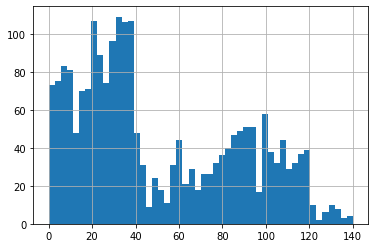

In [4]:
data.N.hist(bins=50)

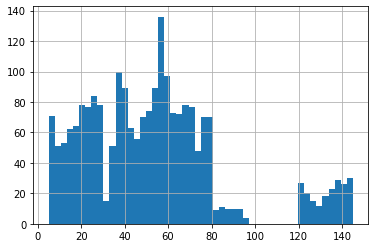

In [5]:
data.P.hist(bins=50)

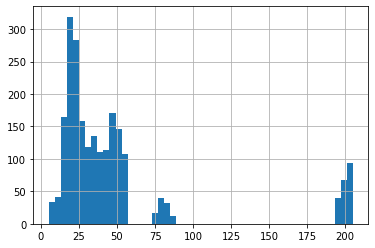

In [6]:
data.K.hist(bins=50)

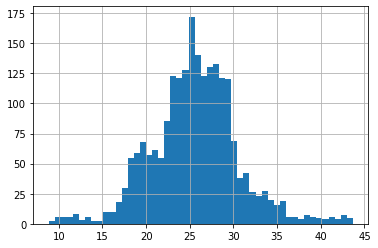

In [7]:
data.temperature.hist(bins=50)

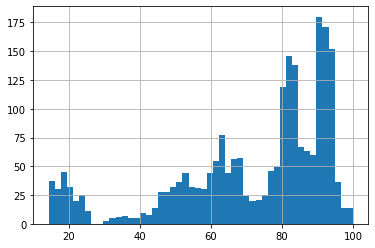

In [8]:
data.humidity.hist(bins=50)

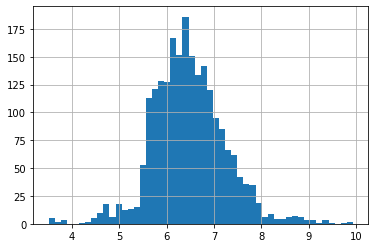

In [9]:
data.ph.hist(bins=50)

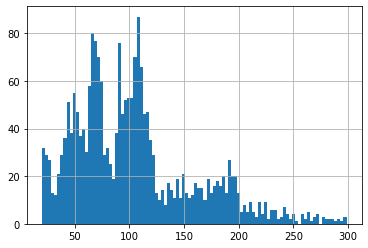

In [10]:
data.rainfall.hist(bins=100)

In [11]:
def get_color(a,b=data.label.unique()):
    for i in range(0,len(b)):
        if a==b[i]:
            return i
    return None

In [12]:
X=data.drop(['label'],axis=1)
Y=pd.get_dummies(data.label)
x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=True,random_state=42,test_size=0.2)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,shuffle=True,random_state=42,test_size=0.2)

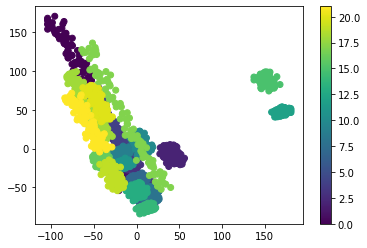

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x=pca.fit_transform(X)
y=[get_color(i) for i in data.label]
plt.scatter(x[:,0],x[:,1],c=y)
plt.colorbar()

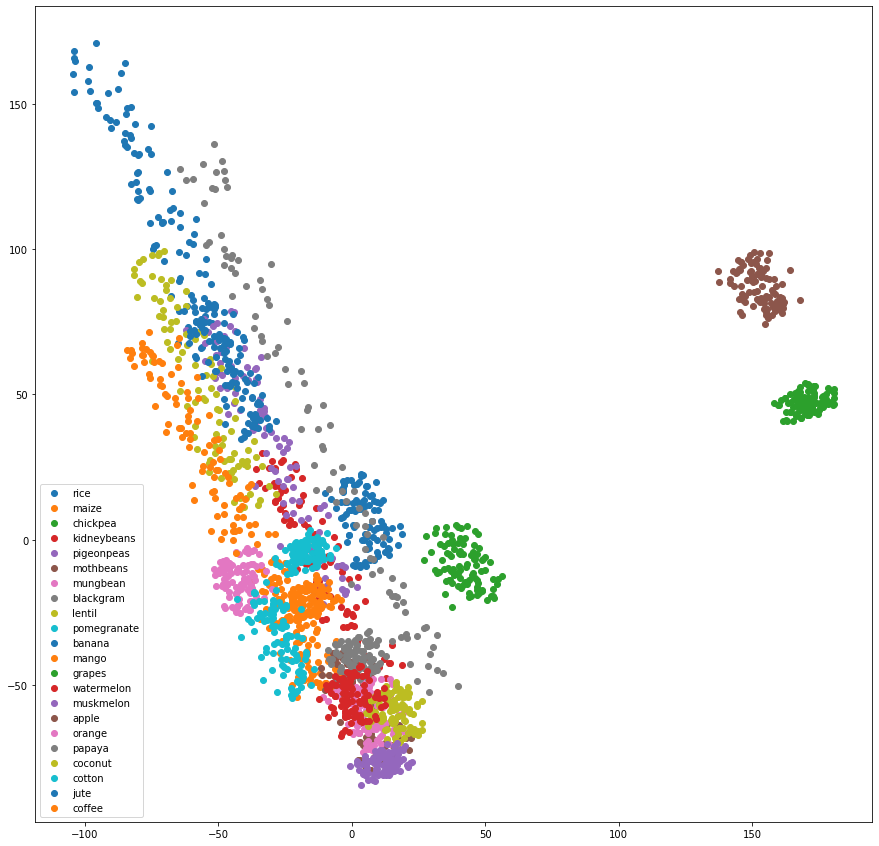

In [14]:
j=10
plt.figure(figsize=(15, 15))
for i in data.label.unique():
    a=data.index[data['label'] == i].tolist()
    X_a=x[a[0]:a[-1],0]
    Y_a=x[a[0]:a[-1],1]
    plt.scatter(X_a,Y_a,label=i)
    j+=10
plt.legend()

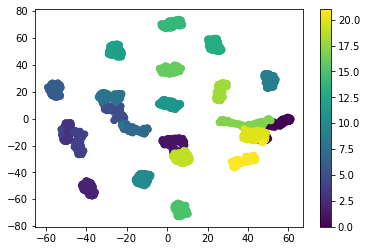

In [15]:
from sklearn.manifold import TSNE
x = TSNE(n_components=2).fit_transform(X)
y=[get_color(i) for i in data.label]
plt.scatter(x[:,0],x[:,1],c=y,label=y)
plt.colorbar()

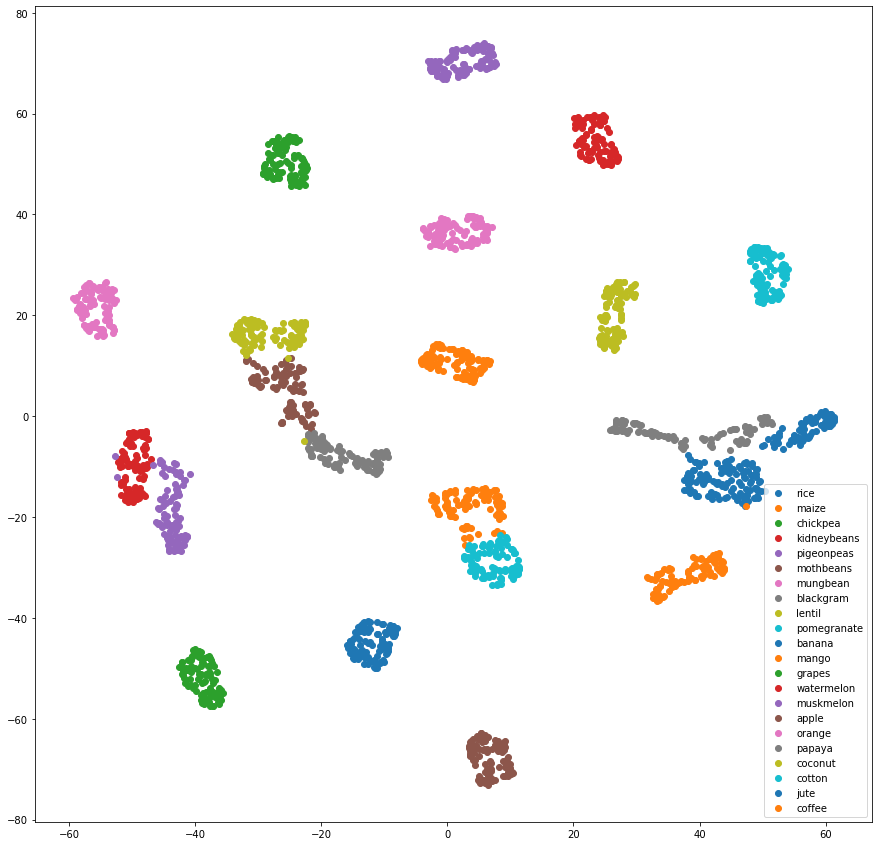

In [16]:
j=10
plt.figure(figsize=(15, 15))
for i in data.label.unique():
    a=data.index[data['label'] == i].tolist()
    X_a=x[a[0]:a[-1],0]
    Y_a=x[a[0]:a[-1],1]
    plt.scatter(X_a,Y_a,label=i)
    j+=10
plt.legend()

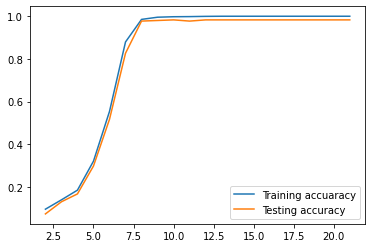

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
depth=[]
train_acc=[]
test_acc=[]
for i in range(2,22):
    depth.append(i)
    clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=i)
    clf_model.fit(x_train,y_train)
    y_predict = clf_model.predict(x_train)
    train_acc.append(accuracy_score(y_train,y_predict))
    y_predict = clf_model.predict(x_test)
    test_acc.append(accuracy_score(y_test,y_predict))
plt.plot(depth,train_acc,label="Training accuaracy")
plt.plot(depth,test_acc,label="Testing accuracy")
plt.legend()

In [18]:
y_predict = clf_model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        16
           2       0.95      1.00      0.97        18
           3       1.00      1.00      1.00        21
           4       0.96      1.00      0.98        24
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        14
           8       0.90      0.95      0.93        20
           9       1.00      1.00      1.00        13
          10       0.89      1.00      0.94         8
          11       1.00      0.94      0.97        16
          12       1.00      1.00      1.00        17
          13       1.00      0.91      0.95        22
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00         9
          17       1.00    

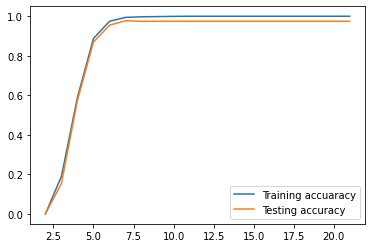

In [19]:
depth=[]
train_acc=[]
test_acc=[]
for i in range(2,22):
    depth.append(i)
    clf_model = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=i)
    clf_model.fit(x_train,y_train)
    y_predict = clf_model.predict(x_train)
    train_acc.append(accuracy_score(y_train,y_predict))
    y_predict = clf_model.predict(x_test)
    test_acc.append(accuracy_score(y_test,y_predict))
plt.plot(depth,train_acc,label="Training accuaracy")
plt.plot(depth,test_acc,label="Testing accuracy")
plt.legend()

In [20]:
y_predict = clf_model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        21
           4       1.00      0.96      0.98        24
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        14
           8       0.78      0.90      0.84        20
           9       1.00      1.00      1.00        13
          10       0.89      1.00      0.94         8
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00        17
          13       1.00      0.95      0.98        22
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00         9
          17       1.00    

In [21]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
clf=OneVsRestClassifier(LinearSVC())
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
print(accuracy_score(y_train,y_pred))
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_predict))

C:\Users\PreetinderPall Singh\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\PreetinderPall Singh\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\PreetinderPall Singh\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\PreetinderPall Singh\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\PreetinderP

0.3181818181818182
0.9744318181818182


C:\Users\PreetinderPall Singh\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\PreetinderPall Singh\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\PreetinderPall Singh\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [22]:
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
x_train = torch.from_numpy(x_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
params = {'batch_size': 64,
          'shuffle': False,
          'num_workers': 6}
training_set=torch.utils.data.TensorDataset(x_train,y_train)
training_generator = torch.utils.data.DataLoader(training_set, **params)

In [23]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 12)
        self.fc2 = nn.Linear(12, 16)
        self.fc3 = nn.Linear(16, 22)
       
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x
model = Net()
device = torch.device('cuda')
model.to(device)
print(model)

Net(
  (fc1): Linear(in_features=7, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=22, bias=True)
)


In [24]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [25]:
num_epochs = 101
losses=[]
Loss_y=[]
Epoch_x=[]
for epoch in range(num_epochs):
    batch=0
    running_loss = 0.0
    for xb,yb in training_generator:
        xb=xb.to(device)
        yb=yb.to(device)
        #forward feed
        y_pred = model(xb.requires_grad_())
        i=0
        for a in y_pred:
            i+=1
        #print(i)
        loss= loss_function(y_pred, yb)

        #backward propagation: calculate gradients
        loss.backward()

        #update the weights
        optimizer.step()

        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        batch+=1
        running_loss += loss.item()
        Epoch_x.append(float(epoch+(batch/len(training_generator))))
        Loss_y.append(float(loss.item()))
        print('epoch {}, batch {}, loss {}'.format(epoch, batch,loss.item()))
    epoch_loss = running_loss / len(training_generator)
    losses.append(epoch_loss)

<ipython-input-23-d006e7d8d3f2>:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


epoch 0, batch 1, loss 0.06453276425600052
epoch 0, batch 2, loss 0.06593246012926102
epoch 0, batch 3, loss 0.06463950872421265
epoch 0, batch 4, loss 0.06119496747851372
epoch 0, batch 5, loss 0.059718117117881775
epoch 0, batch 6, loss 0.05984724313020706
epoch 0, batch 7, loss 0.06102519854903221
epoch 0, batch 8, loss 0.062277406454086304
epoch 0, batch 9, loss 0.06261555850505829
epoch 0, batch 10, loss 0.06277412921190262
epoch 0, batch 11, loss 0.05924706906080246
epoch 0, batch 12, loss 0.060350220650434494
epoch 0, batch 13, loss 0.06224596127867699
epoch 0, batch 14, loss 0.059881146997213364
epoch 0, batch 15, loss 0.05839395523071289
epoch 0, batch 16, loss 0.06025829166173935
epoch 0, batch 17, loss 0.060354992747306824
epoch 0, batch 18, loss 0.06167496368288994
epoch 0, batch 19, loss 0.06033288687467575
epoch 0, batch 20, loss 0.060453128069639206
epoch 0, batch 21, loss 0.05945005267858505
epoch 0, batch 22, loss 0.06192490831017494
epoch 0, batch 23, loss 0.062264118

epoch 7, batch 1, loss 0.045124221593141556
epoch 7, batch 2, loss 0.04591155797243118
epoch 7, batch 3, loss 0.04606293514370918
epoch 7, batch 4, loss 0.04476592317223549
epoch 7, batch 5, loss 0.04456939920783043
epoch 7, batch 6, loss 0.04472815617918968
epoch 7, batch 7, loss 0.04599463939666748
epoch 7, batch 8, loss 0.0456305630505085
epoch 7, batch 9, loss 0.04511911794543266
epoch 7, batch 10, loss 0.04589055851101875
epoch 7, batch 11, loss 0.044003602117300034
epoch 7, batch 12, loss 0.04678827151656151
epoch 7, batch 13, loss 0.04498627781867981
epoch 7, batch 14, loss 0.04640335589647293
epoch 7, batch 15, loss 0.04555724188685417
epoch 7, batch 16, loss 0.04345439374446869
epoch 7, batch 17, loss 0.04434439167380333
epoch 7, batch 18, loss 0.04384947568178177
epoch 7, batch 19, loss 0.04695901274681091
epoch 7, batch 20, loss 0.0450090728700161
epoch 7, batch 21, loss 0.0449504479765892
epoch 7, batch 22, loss 0.04553459957242012
epoch 7, batch 23, loss 0.0471008159220218

epoch 14, batch 1, loss 0.038873326033353806
epoch 14, batch 2, loss 0.04052143916487694
epoch 14, batch 3, loss 0.040729817003011703
epoch 14, batch 4, loss 0.038395222276449203
epoch 14, batch 5, loss 0.037781018763780594
epoch 14, batch 6, loss 0.03852616623044014
epoch 14, batch 7, loss 0.0405319407582283
epoch 14, batch 8, loss 0.03937233239412308
epoch 14, batch 9, loss 0.04052897170186043
epoch 14, batch 10, loss 0.03927282243967056
epoch 14, batch 11, loss 0.03902360051870346
epoch 14, batch 12, loss 0.043205637484788895
epoch 14, batch 13, loss 0.04018967226147652
epoch 14, batch 14, loss 0.04118221998214722
epoch 14, batch 15, loss 0.0406845286488533
epoch 14, batch 16, loss 0.036157820373773575
epoch 14, batch 17, loss 0.03849099949002266
epoch 14, batch 18, loss 0.03886794671416283
epoch 14, batch 19, loss 0.04187389463186264
epoch 14, batch 20, loss 0.038865089416503906
epoch 14, batch 21, loss 0.0387580581009388
epoch 14, batch 22, loss 0.04074886441230774
epoch 14, batch

epoch 21, batch 1, loss 0.032280176877975464
epoch 21, batch 2, loss 0.03797703608870506
epoch 21, batch 3, loss 0.03564917668700218
epoch 21, batch 4, loss 0.03327544406056404
epoch 21, batch 5, loss 0.03300120681524277
epoch 21, batch 6, loss 0.03376122564077377
epoch 21, batch 7, loss 0.03700577840209007
epoch 21, batch 8, loss 0.03445114567875862
epoch 21, batch 9, loss 0.0353553369641304
epoch 21, batch 10, loss 0.035849958658218384
epoch 21, batch 11, loss 0.03577568754553795
epoch 21, batch 12, loss 0.03789598494768143
epoch 21, batch 13, loss 0.034986767917871475
epoch 21, batch 14, loss 0.03519197180867195
epoch 21, batch 15, loss 0.033473119139671326
epoch 21, batch 16, loss 0.030758284032344818
epoch 21, batch 17, loss 0.03384864702820778
epoch 21, batch 18, loss 0.03479465842247009
epoch 21, batch 19, loss 0.03591952100396156
epoch 21, batch 20, loss 0.03283267840743065
epoch 21, batch 21, loss 0.03420636057853699
epoch 21, batch 22, loss 0.036921221762895584
epoch 21, batc

epoch 28, batch 1, loss 0.029166297987103462
epoch 28, batch 2, loss 0.0359795019030571
epoch 28, batch 3, loss 0.032402969896793365
epoch 28, batch 4, loss 0.029860466718673706
epoch 28, batch 5, loss 0.030267242342233658
epoch 28, batch 6, loss 0.031145481392741203
epoch 28, batch 7, loss 0.035179100930690765
epoch 28, batch 8, loss 0.03242890536785126
epoch 28, batch 9, loss 0.03273436799645424
epoch 28, batch 10, loss 0.033461011946201324
epoch 28, batch 11, loss 0.03352196887135506
epoch 28, batch 12, loss 0.03514387831091881
epoch 28, batch 13, loss 0.03266690671443939
epoch 28, batch 14, loss 0.03250536695122719
epoch 28, batch 15, loss 0.030456284061074257
epoch 28, batch 16, loss 0.028101583942770958
epoch 28, batch 17, loss 0.03133653476834297
epoch 28, batch 18, loss 0.032465189695358276
epoch 28, batch 19, loss 0.03328688070178032
epoch 28, batch 20, loss 0.029585670679807663
epoch 28, batch 21, loss 0.03143273666501045
epoch 28, batch 22, loss 0.034653447568416595
epoch 28

epoch 35, batch 1, loss 0.026326840743422508
epoch 35, batch 2, loss 0.030666176229715347
epoch 35, batch 3, loss 0.028530463576316833
epoch 35, batch 4, loss 0.027018461376428604
epoch 35, batch 5, loss 0.027257248759269714
epoch 35, batch 6, loss 0.027572372928261757
epoch 35, batch 7, loss 0.03194277361035347
epoch 35, batch 8, loss 0.029959915205836296
epoch 35, batch 9, loss 0.02894747257232666
epoch 35, batch 10, loss 0.02883833460509777
epoch 35, batch 11, loss 0.029791709035634995
epoch 35, batch 12, loss 0.031270332634449005
epoch 35, batch 13, loss 0.03022720478475094
epoch 35, batch 14, loss 0.030475130304694176
epoch 35, batch 15, loss 0.027190223336219788
epoch 35, batch 16, loss 0.02632846124470234
epoch 35, batch 17, loss 0.027402108535170555
epoch 35, batch 18, loss 0.029547851532697678
epoch 35, batch 19, loss 0.03040754795074463
epoch 35, batch 20, loss 0.025739537551999092
epoch 35, batch 21, loss 0.029115956276655197
epoch 35, batch 22, loss 0.032322805374860764
epo

epoch 42, batch 1, loss 0.024835815653204918
epoch 42, batch 2, loss 0.02776314504444599
epoch 42, batch 3, loss 0.02568722702562809
epoch 42, batch 4, loss 0.02469504438340664
epoch 42, batch 5, loss 0.024235079064965248
epoch 42, batch 6, loss 0.025775184854865074
epoch 42, batch 7, loss 0.02813277579843998
epoch 42, batch 8, loss 0.02601088210940361
epoch 42, batch 9, loss 0.024544889107346535
epoch 42, batch 10, loss 0.025569217279553413
epoch 42, batch 11, loss 0.028308361768722534
epoch 42, batch 12, loss 0.02862279675900936
epoch 42, batch 13, loss 0.02804398164153099
epoch 42, batch 14, loss 0.027174418792128563
epoch 42, batch 15, loss 0.023916924372315407
epoch 42, batch 16, loss 0.0238381065428257
epoch 42, batch 17, loss 0.024220965802669525
epoch 42, batch 18, loss 0.02638128772377968
epoch 42, batch 19, loss 0.02731929160654545
epoch 42, batch 20, loss 0.02304317243397236
epoch 42, batch 21, loss 0.02775277942419052
epoch 42, batch 22, loss 0.027766136452555656
epoch 42, 

epoch 49, batch 1, loss 0.02356504462659359
epoch 49, batch 2, loss 0.0267635490745306
epoch 49, batch 3, loss 0.024302082136273384
epoch 49, batch 4, loss 0.023325877264142036
epoch 49, batch 5, loss 0.023060588166117668
epoch 49, batch 6, loss 0.024925341829657555
epoch 49, batch 7, loss 0.02698371931910515
epoch 49, batch 8, loss 0.02478279359638691
epoch 49, batch 9, loss 0.023023264482617378
epoch 49, batch 10, loss 0.023993944749236107
epoch 49, batch 11, loss 0.02749527059495449
epoch 49, batch 12, loss 0.027004918083548546
epoch 49, batch 13, loss 0.026653822511434555
epoch 49, batch 14, loss 0.025877730920910835
epoch 49, batch 15, loss 0.02283208630979061
epoch 49, batch 16, loss 0.02256888523697853
epoch 49, batch 17, loss 0.023034028708934784
epoch 49, batch 18, loss 0.024999765679240227
epoch 49, batch 19, loss 0.026095524430274963
epoch 49, batch 20, loss 0.021775057539343834
epoch 49, batch 21, loss 0.026919415220618248
epoch 49, batch 22, loss 0.026189658790826797
epoch

epoch 56, batch 1, loss 0.0227862149477005
epoch 56, batch 2, loss 0.02594560757279396
epoch 56, batch 3, loss 0.023502865806221962
epoch 56, batch 4, loss 0.02250290848314762
epoch 56, batch 5, loss 0.022177880629897118
epoch 56, batch 6, loss 0.024250464513897896
epoch 56, batch 7, loss 0.026059173047542572
epoch 56, batch 8, loss 0.023775627836585045
epoch 56, batch 9, loss 0.021847140043973923
epoch 56, batch 10, loss 0.022890517488121986
epoch 56, batch 11, loss 0.02669655904173851
epoch 56, batch 12, loss 0.025609174743294716
epoch 56, batch 13, loss 0.025500845164060593
epoch 56, batch 14, loss 0.024914110079407692
epoch 56, batch 15, loss 0.022133588790893555
epoch 56, batch 16, loss 0.02159188687801361
epoch 56, batch 17, loss 0.02213689684867859
epoch 56, batch 18, loss 0.024072304368019104
epoch 56, batch 19, loss 0.025066176429390907
epoch 56, batch 20, loss 0.02099500596523285
epoch 56, batch 21, loss 0.02627311833202839
epoch 56, batch 22, loss 0.024996593594551086
epoch 

epoch 63, batch 1, loss 0.02207147888839245
epoch 63, batch 2, loss 0.024952054023742676
epoch 63, batch 3, loss 0.02300328016281128
epoch 63, batch 4, loss 0.021683402359485626
epoch 63, batch 5, loss 0.02136952243745327
epoch 63, batch 6, loss 0.023538189008831978
epoch 63, batch 7, loss 0.024821123108267784
epoch 63, batch 8, loss 0.022844228893518448
epoch 63, batch 9, loss 0.02047908492386341
epoch 63, batch 10, loss 0.02189127542078495
epoch 63, batch 11, loss 0.025482604280114174
epoch 63, batch 12, loss 0.024102460592985153
epoch 63, batch 13, loss 0.02423354983329773
epoch 63, batch 14, loss 0.023875098675489426
epoch 63, batch 15, loss 0.0213912446051836
epoch 63, batch 16, loss 0.020667806267738342
epoch 63, batch 17, loss 0.021200651302933693
epoch 63, batch 18, loss 0.023343583568930626
epoch 63, batch 19, loss 0.023899251595139503
epoch 63, batch 20, loss 0.0203597042709589
epoch 63, batch 21, loss 0.02570817805826664
epoch 63, batch 22, loss 0.023796115070581436
epoch 63

epoch 70, batch 1, loss 0.018407702445983887
epoch 70, batch 2, loss 0.02202586457133293
epoch 70, batch 3, loss 0.022491052746772766
epoch 70, batch 4, loss 0.020009664818644524
epoch 70, batch 5, loss 0.020944321528077126
epoch 70, batch 6, loss 0.021701699122786522
epoch 70, batch 7, loss 0.02370450273156166
epoch 70, batch 8, loss 0.021555760875344276
epoch 70, batch 9, loss 0.01749601773917675
epoch 70, batch 10, loss 0.021868467330932617
epoch 70, batch 11, loss 0.02213982120156288
epoch 70, batch 12, loss 0.02312946878373623
epoch 70, batch 13, loss 0.02265123464167118
epoch 70, batch 14, loss 0.023528078570961952
epoch 70, batch 15, loss 0.019521253183484077
epoch 70, batch 16, loss 0.01936349645256996
epoch 70, batch 17, loss 0.020180152729153633
epoch 70, batch 18, loss 0.02249498851597309
epoch 70, batch 19, loss 0.020779602229595184
epoch 70, batch 20, loss 0.01838782988488674
epoch 70, batch 21, loss 0.024094289168715477
epoch 70, batch 22, loss 0.02220492996275425
epoch 7

epoch 77, batch 1, loss 0.017155742272734642
epoch 77, batch 2, loss 0.020814955234527588
epoch 77, batch 3, loss 0.021680407226085663
epoch 77, batch 4, loss 0.019201451912522316
epoch 77, batch 5, loss 0.02019408904016018
epoch 77, batch 6, loss 0.020533869042992592
epoch 77, batch 7, loss 0.022619642317295074
epoch 77, batch 8, loss 0.02058551460504532
epoch 77, batch 9, loss 0.016027484089136124
epoch 77, batch 10, loss 0.021056896075606346
epoch 77, batch 11, loss 0.020995384082198143
epoch 77, batch 12, loss 0.02190006710588932
epoch 77, batch 13, loss 0.02158946357667446
epoch 77, batch 14, loss 0.022296173498034477
epoch 77, batch 15, loss 0.018145108595490456
epoch 77, batch 16, loss 0.018165627494454384
epoch 77, batch 17, loss 0.019223880022764206
epoch 77, batch 18, loss 0.02155465818941593
epoch 77, batch 19, loss 0.019595932215452194
epoch 77, batch 20, loss 0.017011160030961037
epoch 77, batch 21, loss 0.023253032937645912
epoch 77, batch 22, loss 0.021063141524791718
ep

epoch 83, batch 22, loss 0.02043316327035427
epoch 83, batch 23, loss 0.018058249726891518
epoch 83, batch 24, loss 0.02089310623705387
epoch 83, batch 25, loss 0.020626908168196678
epoch 83, batch 26, loss 0.0183347649872303
epoch 83, batch 27, loss 0.01803692616522312
epoch 83, batch 28, loss 0.016656670719385147
epoch 84, batch 1, loss 0.016387585550546646
epoch 84, batch 2, loss 0.020230084657669067
epoch 84, batch 3, loss 0.02092386968433857
epoch 84, batch 4, loss 0.018669474869966507
epoch 84, batch 5, loss 0.019589180126786232
epoch 84, batch 6, loss 0.01978483609855175
epoch 84, batch 7, loss 0.0219582412391901
epoch 84, batch 8, loss 0.019950617104768753
epoch 84, batch 9, loss 0.01509853545576334
epoch 84, batch 10, loss 0.02034454047679901
epoch 84, batch 11, loss 0.020324597135186195
epoch 84, batch 12, loss 0.020977960899472237
epoch 84, batch 13, loss 0.020849786698818207
epoch 84, batch 14, loss 0.021466439589858055
epoch 84, batch 15, loss 0.017278624698519707
epoch 84

epoch 91, batch 1, loss 0.01576586440205574
epoch 91, batch 2, loss 0.019791055470705032
epoch 91, batch 3, loss 0.02032097615301609
epoch 91, batch 4, loss 0.018268585205078125
epoch 91, batch 5, loss 0.019049743190407753
epoch 91, batch 6, loss 0.01921926438808441
epoch 91, batch 7, loss 0.021502278745174408
epoch 91, batch 8, loss 0.019427970051765442
epoch 91, batch 9, loss 0.014418035745620728
epoch 91, batch 10, loss 0.019768092781305313
epoch 91, batch 11, loss 0.01980440691113472
epoch 91, batch 12, loss 0.020184680819511414
epoch 91, batch 13, loss 0.02027891017496586
epoch 91, batch 14, loss 0.0207232479006052
epoch 91, batch 15, loss 0.016583120450377464
epoch 91, batch 16, loss 0.016670208424329758
epoch 91, batch 17, loss 0.017949217930436134
epoch 91, batch 18, loss 0.02049797773361206
epoch 91, batch 19, loss 0.018199864774942398
epoch 91, batch 20, loss 0.015543456189334393
epoch 91, batch 21, loss 0.022124694660305977
epoch 91, batch 22, loss 0.019758909940719604
epoch

epoch 98, batch 1, loss 0.015236197970807552
epoch 98, batch 2, loss 0.01939627341926098
epoch 98, batch 3, loss 0.01977456361055374
epoch 98, batch 4, loss 0.017946403473615646
epoch 98, batch 5, loss 0.018554994836449623
epoch 98, batch 6, loss 0.018739216029644012
epoch 98, batch 7, loss 0.021161362528800964
epoch 98, batch 8, loss 0.018944447860121727
epoch 98, batch 9, loss 0.0138703603297472
epoch 98, batch 10, loss 0.01927568018436432
epoch 98, batch 11, loss 0.019382333382964134
epoch 98, batch 12, loss 0.01944701001048088
epoch 98, batch 13, loss 0.019792446866631508
epoch 98, batch 14, loss 0.02006184123456478
epoch 98, batch 15, loss 0.016003292053937912
epoch 98, batch 16, loss 0.016126027330756187
epoch 98, batch 17, loss 0.017442654818296432
epoch 98, batch 18, loss 0.020209694281220436
epoch 98, batch 19, loss 0.017626741901040077
epoch 98, batch 20, loss 0.015005539171397686
epoch 98, batch 21, loss 0.021716879680752754
epoch 98, batch 22, loss 0.019249096512794495
epoc

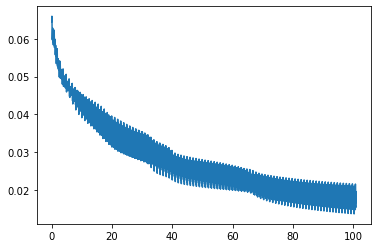

In [26]:
plt.plot(Epoch_x,Loss_y)

In [27]:
x_test=x_test.to_numpy()
y_test=y_test.to_numpy()
x_test = torch.from_numpy(x_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
params = {'batch_size': 64,
          'shuffle': False,
          'num_workers': 6}
test_set=torch.utils.data.TensorDataset(x_test,y_test)
test_generator = torch.utils.data.DataLoader(test_set, **params)

In [28]:
def cal_acc(a,b):
    ans=0
    for i in range(0,len(a)):
        c=a[i].cpu().detach().numpy()
        d=b[i].cpu().detach().numpy()
        c=np.where(c == np.amax(c))
        d=np.where(d == np.amax(d))
        if d==c:
            ans+=1
    return (ans/len(a))

In [29]:
a=[]
b=[]
i=1
for xb,yb in test_generator:
    xb=xb.to(device)
    yb=yb.to(device)
    #forward feed
    y_pred = model(xb)
    a.append(i)
    i+=1
    b.append(cal_acc(yb,y_pred))

<ipython-input-23-d006e7d8d3f2>:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


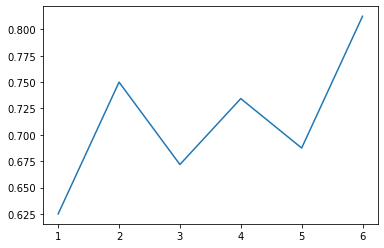

In [30]:
plt.plot(a,b)

In [31]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 12)
        self.fc2 = nn.Linear(12, 16)
        self.fc3 = nn.Linear(16, 18)
        self.fc4 = nn.Linear(18, 20)
        self.fc5 = nn.Linear(20, 22)
       
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.softmax(self.fc5(x))
        return x
model = Net()
device = torch.device('cuda')
model.to(device)
print(model)

Net(
  (fc1): Linear(in_features=7, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=18, bias=True)
  (fc4): Linear(in_features=18, out_features=20, bias=True)
  (fc5): Linear(in_features=20, out_features=22, bias=True)
)


In [32]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [33]:
num_epochs = 101
losses=[]
Loss_y=[]
Epoch_x=[]
for epoch in range(num_epochs):
    batch=0
    running_loss = 0.0
    for xb,yb in training_generator:
        xb=xb.to(device)
        yb=yb.to(device)
        #forward feed
        y_pred = model(xb.requires_grad_())
        i=0
        for a in y_pred:
            i+=1
        #print(i)
        loss= loss_function(y_pred, yb)

        #backward propagation: calculate gradients
        loss.backward()

        #update the weights
        optimizer.step()

        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        batch+=1
        running_loss += loss.item()
        Epoch_x.append(float(epoch+(batch/len(training_generator))))
        Loss_y.append(float(loss.item()))
        print('epoch {}, batch {}, loss {}'.format(epoch, batch,loss.item()))
    epoch_loss = running_loss / len(training_generator)
    losses.append(epoch_loss)

<ipython-input-31-040f2f040d33>:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc5(x))


epoch 0, batch 1, loss 0.047214899212121964
epoch 0, batch 2, loss 0.047262974083423615
epoch 0, batch 3, loss 0.0472298339009285
epoch 0, batch 4, loss 0.04658917710185051
epoch 0, batch 5, loss 0.046692319214344025
epoch 0, batch 6, loss 0.046326953917741776
epoch 0, batch 7, loss 0.04602012038230896
epoch 0, batch 8, loss 0.04690595343708992
epoch 0, batch 9, loss 0.04675721004605293
epoch 0, batch 10, loss 0.04612807556986809
epoch 0, batch 11, loss 0.045851338654756546
epoch 0, batch 12, loss 0.04566565155982971
epoch 0, batch 13, loss 0.04566436633467674
epoch 0, batch 14, loss 0.046124622225761414
epoch 0, batch 15, loss 0.046451468020677567
epoch 0, batch 16, loss 0.04676835238933563
epoch 0, batch 17, loss 0.04635006934404373
epoch 0, batch 18, loss 0.046308811753988266
epoch 0, batch 19, loss 0.04641531780362129
epoch 0, batch 20, loss 0.04586826264858246
epoch 0, batch 21, loss 0.04537532106041908
epoch 0, batch 22, loss 0.04569053649902344
epoch 0, batch 23, loss 0.04641576

epoch 6, batch 26, loss 0.04327027127146721
epoch 6, batch 27, loss 0.04380813613533974
epoch 6, batch 28, loss 0.04332476854324341
epoch 7, batch 1, loss 0.043710075318813324
epoch 7, batch 2, loss 0.043239887803792953
epoch 7, batch 3, loss 0.04377121478319168
epoch 7, batch 4, loss 0.04335498809814453
epoch 7, batch 5, loss 0.043389637023210526
epoch 7, batch 6, loss 0.04335002973675728
epoch 7, batch 7, loss 0.042814843356609344
epoch 7, batch 8, loss 0.04332798346877098
epoch 7, batch 9, loss 0.043269138783216476
epoch 7, batch 10, loss 0.04312364384531975
epoch 7, batch 11, loss 0.042860884219408035
epoch 7, batch 12, loss 0.04306197166442871
epoch 7, batch 13, loss 0.04245785251259804
epoch 7, batch 14, loss 0.04318517446517944
epoch 7, batch 15, loss 0.04347991943359375
epoch 7, batch 16, loss 0.043495822697877884
epoch 7, batch 17, loss 0.04333196580410004
epoch 7, batch 18, loss 0.04359296336770058
epoch 7, batch 19, loss 0.043471574783325195
epoch 7, batch 20, loss 0.0431449

epoch 14, batch 1, loss 0.042752690613269806
epoch 14, batch 2, loss 0.041606198996305466
epoch 14, batch 3, loss 0.04225651174783707
epoch 14, batch 4, loss 0.04166727513074875
epoch 14, batch 5, loss 0.041643161326646805
epoch 14, batch 6, loss 0.042073920369148254
epoch 14, batch 7, loss 0.040491294115781784
epoch 14, batch 8, loss 0.041347235441207886
epoch 14, batch 9, loss 0.04141442850232124
epoch 14, batch 10, loss 0.041365623474121094
epoch 14, batch 11, loss 0.04139375686645508
epoch 14, batch 12, loss 0.04175606369972229
epoch 14, batch 13, loss 0.04065762832760811
epoch 14, batch 14, loss 0.04156827554106712
epoch 14, batch 15, loss 0.042101237922906876
epoch 14, batch 16, loss 0.04180467128753662
epoch 14, batch 17, loss 0.0415082611143589
epoch 14, batch 18, loss 0.042142439633607864
epoch 14, batch 19, loss 0.041888527572155
epoch 14, batch 20, loss 0.04172458127140999
epoch 14, batch 21, loss 0.04165755957365036
epoch 14, batch 22, loss 0.040867049247026443
epoch 14, ba

epoch 20, batch 18, loss 0.039778780192136765
epoch 20, batch 19, loss 0.03957723453640938
epoch 20, batch 20, loss 0.03843697905540466
epoch 20, batch 21, loss 0.03779525309801102
epoch 20, batch 22, loss 0.03693373128771782
epoch 20, batch 23, loss 0.04109860211610794
epoch 20, batch 24, loss 0.03911886364221573
epoch 20, batch 25, loss 0.03861236572265625
epoch 20, batch 26, loss 0.03792619705200195
epoch 20, batch 27, loss 0.03880975395441055
epoch 20, batch 28, loss 0.03659564256668091
epoch 21, batch 1, loss 0.040449123829603195
epoch 21, batch 2, loss 0.03833961486816406
epoch 21, batch 3, loss 0.03896459937095642
epoch 21, batch 4, loss 0.03604194521903992
epoch 21, batch 5, loss 0.03707197308540344
epoch 21, batch 6, loss 0.03860705718398094
epoch 21, batch 7, loss 0.03563684970140457
epoch 21, batch 8, loss 0.03717619180679321
epoch 21, batch 9, loss 0.03788599371910095
epoch 21, batch 10, loss 0.03611161559820175
epoch 21, batch 11, loss 0.036847710609436035
epoch 21, batch 

epoch 28, batch 1, loss 0.03596613556146622
epoch 28, batch 2, loss 0.03484528884291649
epoch 28, batch 3, loss 0.035069964826107025
epoch 28, batch 4, loss 0.032607175409793854
epoch 28, batch 5, loss 0.03422567620873451
epoch 28, batch 6, loss 0.03492099791765213
epoch 28, batch 7, loss 0.03234465792775154
epoch 28, batch 8, loss 0.03274033963680267
epoch 28, batch 9, loss 0.033370427787303925
epoch 28, batch 10, loss 0.032364387065172195
epoch 28, batch 11, loss 0.03337976336479187
epoch 28, batch 12, loss 0.03447647765278816
epoch 28, batch 13, loss 0.031382299959659576
epoch 28, batch 14, loss 0.034505583345890045
epoch 28, batch 15, loss 0.03418271616101265
epoch 28, batch 16, loss 0.03355482965707779
epoch 28, batch 17, loss 0.03290260583162308
epoch 28, batch 18, loss 0.03659345582127571
epoch 28, batch 19, loss 0.03536004200577736
epoch 28, batch 20, loss 0.033026427030563354
epoch 28, batch 21, loss 0.033398255705833435
epoch 28, batch 22, loss 0.031913042068481445
epoch 28, 

epoch 35, batch 1, loss 0.031046545132994652
epoch 35, batch 2, loss 0.03141608089208603
epoch 35, batch 3, loss 0.031223461031913757
epoch 35, batch 4, loss 0.02936183102428913
epoch 35, batch 5, loss 0.030808981508016586
epoch 35, batch 6, loss 0.0317034088075161
epoch 35, batch 7, loss 0.029224494472146034
epoch 35, batch 8, loss 0.02851211093366146
epoch 35, batch 9, loss 0.028548458591103554
epoch 35, batch 10, loss 0.028829066082835197
epoch 35, batch 11, loss 0.02999338135123253
epoch 35, batch 12, loss 0.030191775411367416
epoch 35, batch 13, loss 0.026763765141367912
epoch 35, batch 14, loss 0.029627082869410515
epoch 35, batch 15, loss 0.028850756585597992
epoch 35, batch 16, loss 0.029710810631513596
epoch 35, batch 17, loss 0.028975021094083786
epoch 35, batch 18, loss 0.03339808061718941
epoch 35, batch 19, loss 0.030572718009352684
epoch 35, batch 20, loss 0.027867237105965614
epoch 35, batch 21, loss 0.029225414618849754
epoch 35, batch 22, loss 0.0273093543946743
epoch 

epoch 42, batch 1, loss 0.027160482481122017
epoch 42, batch 2, loss 0.027202734723687172
epoch 42, batch 3, loss 0.02718573808670044
epoch 42, batch 4, loss 0.024719709530472755
epoch 42, batch 5, loss 0.02640562877058983
epoch 42, batch 6, loss 0.027817483991384506
epoch 42, batch 7, loss 0.026154886931180954
epoch 42, batch 8, loss 0.024094782769680023
epoch 42, batch 9, loss 0.024153564125299454
epoch 42, batch 10, loss 0.023425482213497162
epoch 42, batch 11, loss 0.02581006847321987
epoch 42, batch 12, loss 0.02642112597823143
epoch 42, batch 13, loss 0.02245313487946987
epoch 42, batch 14, loss 0.02535390295088291
epoch 42, batch 15, loss 0.024533743038773537
epoch 42, batch 16, loss 0.02612752839922905
epoch 42, batch 17, loss 0.025214260444045067
epoch 42, batch 18, loss 0.028723809868097305
epoch 42, batch 19, loss 0.026207339018583298
epoch 42, batch 20, loss 0.021903838962316513
epoch 42, batch 21, loss 0.02544884942471981
epoch 42, batch 22, loss 0.02319188602268696
epoch 

epoch 49, batch 1, loss 0.024515042081475258
epoch 49, batch 2, loss 0.023335620760917664
epoch 49, batch 3, loss 0.023480525240302086
epoch 49, batch 4, loss 0.020227855071425438
epoch 49, batch 5, loss 0.02300441265106201
epoch 49, batch 6, loss 0.024525033310055733
epoch 49, batch 7, loss 0.02295658364892006
epoch 49, batch 8, loss 0.021584175527095795
epoch 49, batch 9, loss 0.020415298640727997
epoch 49, batch 10, loss 0.019987845793366432
epoch 49, batch 11, loss 0.021840039640665054
epoch 49, batch 12, loss 0.022412722930312157
epoch 49, batch 13, loss 0.019188882783055305
epoch 49, batch 14, loss 0.02172064036130905
epoch 49, batch 15, loss 0.020817451179027557
epoch 49, batch 16, loss 0.023475423455238342
epoch 49, batch 17, loss 0.022455831989645958
epoch 49, batch 18, loss 0.025150077417492867
epoch 49, batch 19, loss 0.02285822667181492
epoch 49, batch 20, loss 0.01881023682653904
epoch 49, batch 21, loss 0.02218175120651722
epoch 49, batch 22, loss 0.02033391036093235
epoc

epoch 56, batch 1, loss 0.02242865413427353
epoch 56, batch 2, loss 0.020958662033081055
epoch 56, batch 3, loss 0.02129409648478031
epoch 56, batch 4, loss 0.017348796129226685
epoch 56, batch 5, loss 0.020735755562782288
epoch 56, batch 6, loss 0.022450653836131096
epoch 56, batch 7, loss 0.020867228507995605
epoch 56, batch 8, loss 0.01974152773618698
epoch 56, batch 9, loss 0.01781168393790722
epoch 56, batch 10, loss 0.017845621332526207
epoch 56, batch 11, loss 0.01963409036397934
epoch 56, batch 12, loss 0.01960175670683384
epoch 56, batch 13, loss 0.017191998660564423
epoch 56, batch 14, loss 0.019386980682611465
epoch 56, batch 15, loss 0.018257182091474533
epoch 56, batch 16, loss 0.021749461069703102
epoch 56, batch 17, loss 0.020429350435733795
epoch 56, batch 18, loss 0.022764544934034348
epoch 56, batch 19, loss 0.020622218027710915
epoch 56, batch 20, loss 0.016759971156716347
epoch 56, batch 21, loss 0.020007014274597168
epoch 56, batch 22, loss 0.018127016723155975
epo

epoch 63, batch 1, loss 0.020674338564276695
epoch 63, batch 2, loss 0.01926545426249504
epoch 63, batch 3, loss 0.019476231187582016
epoch 63, batch 4, loss 0.015422250144183636
epoch 63, batch 5, loss 0.01894429512321949
epoch 63, batch 6, loss 0.020668575540184975
epoch 63, batch 7, loss 0.019027339294552803
epoch 63, batch 8, loss 0.01833439990878105
epoch 63, batch 9, loss 0.015953462570905685
epoch 63, batch 10, loss 0.016320280730724335
epoch 63, batch 11, loss 0.017985034734010696
epoch 63, batch 12, loss 0.017365500330924988
epoch 63, batch 13, loss 0.015623684041202068
epoch 63, batch 14, loss 0.017716003581881523
epoch 63, batch 15, loss 0.016570884734392166
epoch 63, batch 16, loss 0.020480560138821602
epoch 63, batch 17, loss 0.018857823684811592
epoch 63, batch 18, loss 0.020747952163219452
epoch 63, batch 19, loss 0.019235149025917053
epoch 63, batch 20, loss 0.014893450774252415
epoch 63, batch 21, loss 0.018130358308553696
epoch 63, batch 22, loss 0.01616852916777134
e

epoch 70, batch 1, loss 0.019061395898461342
epoch 70, batch 2, loss 0.01797505095601082
epoch 70, batch 3, loss 0.017927223816514015
epoch 70, batch 4, loss 0.013944964855909348
epoch 70, batch 5, loss 0.017338847741484642
epoch 70, batch 6, loss 0.0191614031791687
epoch 70, batch 7, loss 0.017659321427345276
epoch 70, batch 8, loss 0.01724032685160637
epoch 70, batch 9, loss 0.014398022554814816
epoch 70, batch 10, loss 0.015216578729450703
epoch 70, batch 11, loss 0.016588119789958
epoch 70, batch 12, loss 0.015656569972634315
epoch 70, batch 13, loss 0.014317244291305542
epoch 70, batch 14, loss 0.01623363606631756
epoch 70, batch 15, loss 0.015243636444211006
epoch 70, batch 16, loss 0.01946845091879368
epoch 70, batch 17, loss 0.017591780051589012
epoch 70, batch 18, loss 0.019253062084317207
epoch 70, batch 19, loss 0.01811605505645275
epoch 70, batch 20, loss 0.013407276943325996
epoch 70, batch 21, loss 0.016582652926445007
epoch 70, batch 22, loss 0.014742439612746239
epoch 7

epoch 77, batch 1, loss 0.017957648262381554
epoch 77, batch 2, loss 0.01697765477001667
epoch 77, batch 3, loss 0.01705770008265972
epoch 77, batch 4, loss 0.01314176432788372
epoch 77, batch 5, loss 0.01626729778945446
epoch 77, batch 6, loss 0.018069535493850708
epoch 77, batch 7, loss 0.01691496931016445
epoch 77, batch 8, loss 0.016537636518478394
epoch 77, batch 9, loss 0.013455646112561226
epoch 77, batch 10, loss 0.014308851212263107
epoch 77, batch 11, loss 0.015611596405506134
epoch 77, batch 12, loss 0.014434435404837132
epoch 77, batch 13, loss 0.01342434249818325
epoch 77, batch 14, loss 0.015267880633473396
epoch 77, batch 15, loss 0.014114472083747387
epoch 77, batch 16, loss 0.01887466013431549
epoch 77, batch 17, loss 0.016780829057097435
epoch 77, batch 18, loss 0.01836548186838627
epoch 77, batch 19, loss 0.01729411818087101
epoch 77, batch 20, loss 0.0124843530356884
epoch 77, batch 21, loss 0.015588545240461826
epoch 77, batch 22, loss 0.013749941252171993
epoch 77

epoch 84, batch 1, loss 0.017334062606096268
epoch 84, batch 2, loss 0.016271555796265602
epoch 84, batch 3, loss 0.01638719253242016
epoch 84, batch 4, loss 0.012632233090698719
epoch 84, batch 5, loss 0.015445439144968987
epoch 84, batch 6, loss 0.01733366586267948
epoch 84, batch 7, loss 0.016364533454179764
epoch 84, batch 8, loss 0.01605800725519657
epoch 84, batch 9, loss 0.01277831755578518
epoch 84, batch 10, loss 0.013558323495090008
epoch 84, batch 11, loss 0.01491990964859724
epoch 84, batch 12, loss 0.013515738770365715
epoch 84, batch 13, loss 0.012748409993946552
epoch 84, batch 14, loss 0.014522887766361237
epoch 84, batch 15, loss 0.013254168443381786
epoch 84, batch 16, loss 0.0184082742780447
epoch 84, batch 17, loss 0.01622726581990719
epoch 84, batch 18, loss 0.017653170973062515
epoch 84, batch 19, loss 0.016737952828407288
epoch 84, batch 20, loss 0.011823993176221848
epoch 84, batch 21, loss 0.014831386506557465
epoch 84, batch 22, loss 0.012943440116941929
epoch

epoch 90, batch 24, loss 0.017323825508356094
epoch 90, batch 25, loss 0.01556704007089138
epoch 90, batch 26, loss 0.016215359792113304
epoch 90, batch 27, loss 0.01862962916493416
epoch 90, batch 28, loss 0.012727873399853706
epoch 91, batch 1, loss 0.01689193770289421
epoch 91, batch 2, loss 0.015710603445768356
epoch 91, batch 3, loss 0.01583133265376091
epoch 91, batch 4, loss 0.012191563844680786
epoch 91, batch 5, loss 0.014699283055961132
epoch 91, batch 6, loss 0.016718517988920212
epoch 91, batch 7, loss 0.015916796401143074
epoch 91, batch 8, loss 0.015712879598140717
epoch 91, batch 9, loss 0.012192836031317711
epoch 91, batch 10, loss 0.012844366952776909
epoch 91, batch 11, loss 0.014427125453948975
epoch 91, batch 12, loss 0.01265721209347248
epoch 91, batch 13, loss 0.012183170765638351
epoch 91, batch 14, loss 0.013931634835898876
epoch 91, batch 15, loss 0.012564962729811668
epoch 91, batch 16, loss 0.018008625134825706
epoch 91, batch 17, loss 0.015788501128554344
ep

epoch 97, batch 20, loss 0.010748980566859245
epoch 97, batch 21, loss 0.013592910021543503
epoch 97, batch 22, loss 0.011578752659261227
epoch 97, batch 23, loss 0.012945543974637985
epoch 97, batch 24, loss 0.016669536009430885
epoch 97, batch 25, loss 0.014939742162823677
epoch 97, batch 26, loss 0.0157774705439806
epoch 97, batch 27, loss 0.01805971935391426
epoch 97, batch 28, loss 0.012308512814342976
epoch 98, batch 1, loss 0.01651272177696228
epoch 98, batch 2, loss 0.015207571908831596
epoch 98, batch 3, loss 0.015247434377670288
epoch 98, batch 4, loss 0.011826778762042522
epoch 98, batch 5, loss 0.014041854999959469
epoch 98, batch 6, loss 0.016206199303269386
epoch 98, batch 7, loss 0.015512583777308464
epoch 98, batch 8, loss 0.015352754853665829
epoch 98, batch 9, loss 0.011763107031583786
epoch 98, batch 10, loss 0.012027938850224018
epoch 98, batch 11, loss 0.014155087992548943
epoch 98, batch 12, loss 0.011891838163137436
epoch 98, batch 13, loss 0.011551608331501484
e

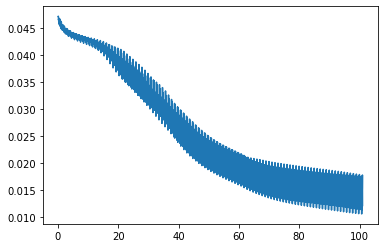

In [36]:
plt.plot(Epoch_x,Loss_y)

In [34]:
a=[]
b=[]
i=1
for xb,yb in test_generator:
    xb=xb.to(device)
    yb=yb.to(device)
    #forward feed
    y_pred = model(xb)
    a.append(i)
    i+=1
    b.append(cal_acc(yb,y_pred))

<ipython-input-31-040f2f040d33>:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc5(x))


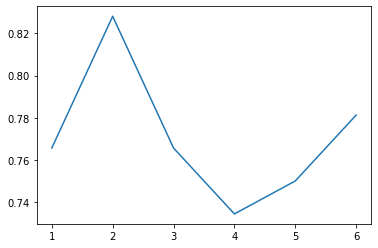

In [35]:
plt.plot(a,b)